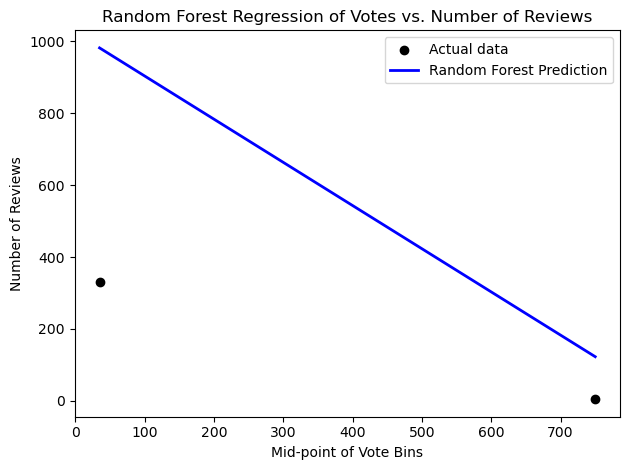

Feature importances: [1.]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your JSON file
data = pd.read_json('C:/USD/ms-aai-501-final-project/data/Software_5-core.json', lines=True)

# Convert the 'vote' column to numeric, handling non-numeric values
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')
data.dropna(subset=['vote'], inplace=True)

# Cast votes to integer
data['vote'] = data['vote'].astype(int)

# Define the bins and labels for vote counts
bins = [-1, 0, 10, 20, 50, 100, 500, 1000, np.inf]  # Adjust the bins as needed
bin_labels = [0, 5, 15, 35, 75, 300, 750, 1500]  # Midpoints of the bins

# Bin the vote counts using pd.cut and assign bin labels as midpoints
data['vote_bin'] = pd.cut(data['vote'], bins=bins, labels=bin_labels)

# Convert binned vote labels to integers
data['vote_bin'] = data['vote_bin'].astype(int)

# Group by the binned vote counts and get the number of reviews for each bin
vote_counts = data.groupby('vote_bin').size().reset_index(name='review_count')

# Prepare data for Random Forest regression
X = vote_counts['vote_bin'].values.reshape(-1, 1)  # Feature matrix (independent variable)
y = vote_counts['review_count'].values  # Target vector (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Sort the test set and predicted values for plotting (for a continuous curve)
sorted_idx = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot outputs
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test_sorted, y_pred_sorted, color='blue', linewidth=2, label='Random Forest Prediction')

plt.xlabel('Mid-point of Vote Bins')
plt.ylabel('Number of Reviews')
plt.title('Random Forest Regression of Votes vs. Number of Reviews')
plt.legend()

plt.tight_layout()
plt.show()

# Optionally, you could print out the feature importances
feature_importances = rf_regressor.feature_importances_
print("Feature importances:", feature_importances)